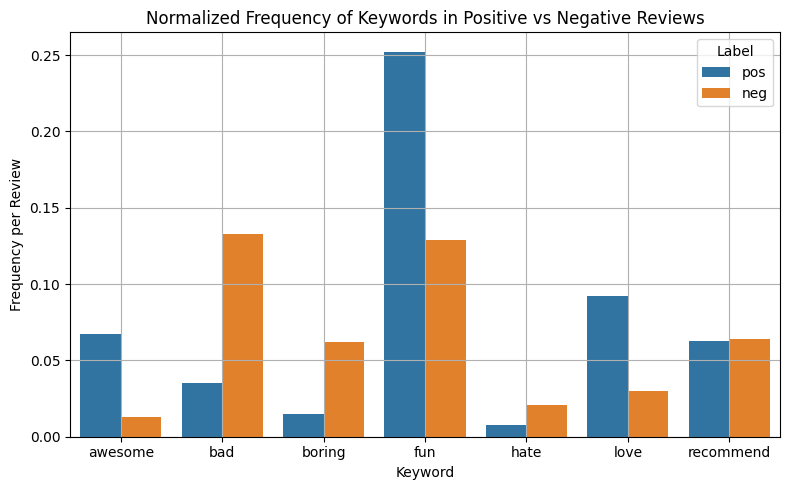

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Hadoop results from file
df_hadoop = pd.read_csv(
    "Project/output_h1.txt", sep="\t", header=None, names=["key", "count"]
)

# Split 'key' into 'label' and 'word'
df_hadoop[["label", "word"]] = df_hadoop["key"].str.split("_", expand=True)

# Load the dataset to count positive and negative reviews
df_reviews = pd.read_csv("Project/clean_sample.csv")
n_pos = (df_reviews["review_score"] == 1).sum()
n_neg = (df_reviews["review_score"] == -1).sum()
total_reviews = {"pos": n_pos, "neg": n_neg}

# Calculate normalized frequency
df_hadoop["normalized"] = df_hadoop.apply(
    lambda row: row["count"] / total_reviews[row["label"]], axis=1
)

# Prepare data for plot
pivot_df = df_hadoop.pivot(
    index="word", columns="label", values="normalized"
).reset_index()
plot_df = pivot_df.melt(id_vars="word", var_name="Label", value_name="Frequency")
plot_df["Label"] = pd.Categorical(
    plot_df["Label"], categories=["pos", "neg"], ordered=True
)

# Generate plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_df, x="word", y="Frequency", hue="Label", hue_order=["pos", "neg"]
)
plt.title("Normalized Frequency of Keywords in Positive vs Negative Reviews")
plt.ylabel("Frequency per Review")
plt.xlabel("Keyword")
plt.tight_layout()
plt.grid(True)
plt.show()